In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import os

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [4]:
path_result = "Data/RealData/Recurcive/Results/"
path_output = "Data/RealData/Recurcive/Output/"

In [5]:
imp_file_list = [f for f in os.listdir(path_result) if os.path.splitext(f)[-1]==".pkl" if "imp" in f]
# len(imp_file_list)

In [6]:
imp_file_list

['GB_12I1O_df_imp_Sheet1.pkl']

In [7]:
df_imp = pd.read_pickle(path_result + imp_file_list[0])

In [63]:
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Input_Plant annual CO2 emissions (tons),0.232674,Input_Plant annual CO2 emissions (tons),982,0
1,Input_Plant annual NOx emissions (tons),0.191950,Input_Plant annual NOx emissions (tons),721,0
2,Output_Plant annual net generation (MWh),0.188082,Output_Plant annual net generation (MWh),0,0
3,Input_Plant annual CH4 emissions (lbs),0.124704,Input_Plant annual CH4 emissions (lbs),1677,0
4,Input_Plant annual SO2 emissions (tons),0.074364,Input_Plant annual SO2 emissions (tons),1219,0
...,...,...,...,...,...
175,Input_Plant total annual heat input (MMBtu),0.064630,Input_Plant total annual heat input (MMBtu),33,19
176,Input_Plant annual NOx emissions (tons),0.029092,Input_Plant annual NOx emissions (tons),158,19
177,Input_Plant nameplate capacity (MW),0.020253,Input_Plant nameplate capacity (MW),248,19
178,Input_Plant annual SO2 emissions (tons),0.019477,Input_Plant annual SO2 emissions (tons),240,19


In [64]:
res_file_list = [f for f in os.listdir(path_result) if os.path.splitext(f)[-1]==".pkl" if "imp" not in f]
# len(res_file_list)

In [65]:
res_file_list

['GB_result_12I1O_Sheet1.pkl']

In [66]:
res = pd.read_pickle(path_result + res_file_list[0])

In [67]:
df_res = pd.DataFrame({"Iteration":[i[0] for i in res],
                            "R2":[j[3]["r2"] for j in res],
                           "Importance":[k[2] for k in res]})

In [68]:
df_res

,Iteration,R2,Importance
0,0,0.879178,"[Input_Plant annual CO2 emissions (tons), Input_Plant annual NOx emissions (tons), Input_Plant annual CH4 emissions (lbs), Input_Plant annual SO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant nameplate capacity (MW), Input_Plant annual N2O emissions (lbs), Input_Number of generators]"
1,1,0.605396,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual NOx emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Number of generators, Input_Plant annual CO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Plant annual N2O emissions (lbs)]"
2,2,0.714738,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual SO2 emissions (tons), Input_Plant annual NOx emissions (tons), Input_Plant annual CO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]"
3,3,0.824236,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]"
4,4,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]"
...,...,...,...
15,15,0.816000,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]"
16,16,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]"
17,17,0.816000,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]"
18,18,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]"


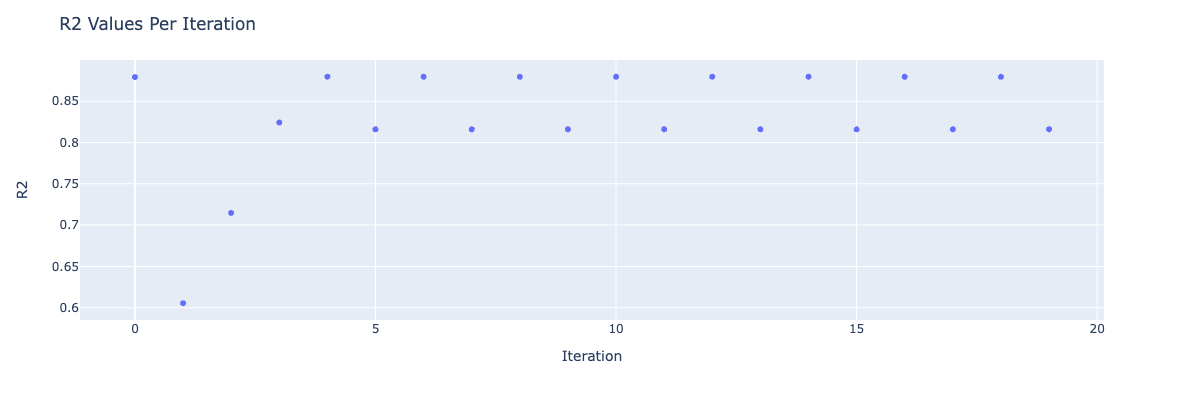

In [69]:
fig = px.scatter(df_res, x = "Iteration", y = "R2")

fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    title_text=f"R2 Values Per Iteration"
)

fig .show()

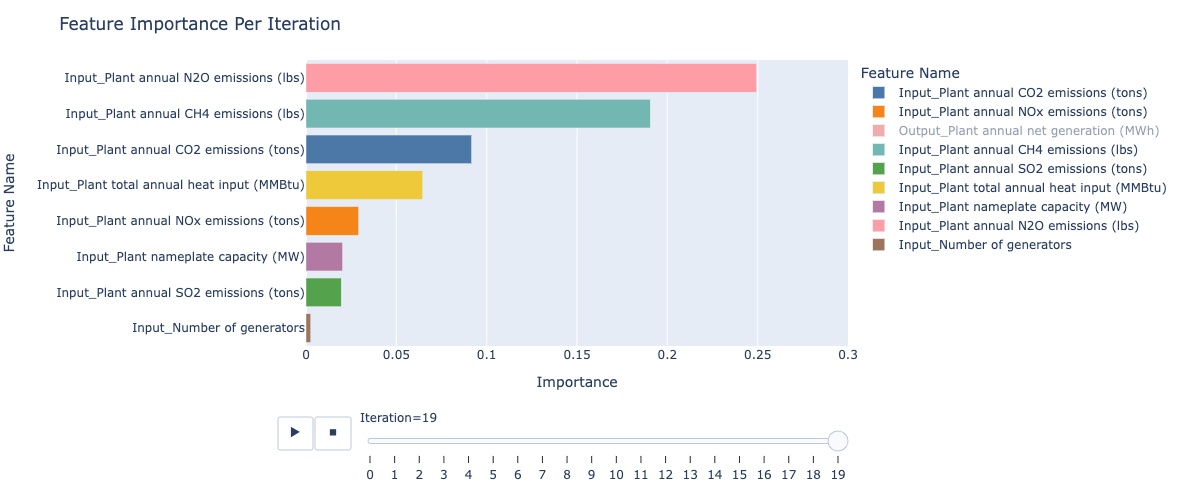

In [71]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=1500,
    height=500,
    title_text=f"Feature Importance Per Iteration",
)


fig.show()

In [15]:
converge = {}
df_zero = pd.DataFrame()
df_imp = pd.DataFrame()
for f in imp_file_list:
    
    ds = os.path.splitext(f)[0].split("_")[-1]
    
    # convergence
    converge_key = ds
    df_temp = pd.read_pickle(path_result + f)
    converge_value = df_temp.Iteration.max()
    converge.update({converge_key:converge_value})
    
    # Top 4 important features
    df_temp["DS"] = ds 
    df_imp = pd.concat([df_imp, df_temp], ignore_index=True)
    
    
    # Zero Count
    df_temp_zero = df_temp.groupby("Iteration", as_index=False)["Zero_Count"].sum()
    df_temp_zero["DS"] = ds 
    df_zero = pd.concat([df_zero, df_temp_zero], ignore_index = True)

In [16]:
df_r2 = pd.DataFrame()
for f in res_file_list:
    
    ds = os.path.splitext(f)[0].split("_")[-1]
    
    with open(path_result + f, "rb") as file:
        r = pickle.load(file)
    
    # R2
    df_temp = pd.DataFrame({"Iteration":[i[0] for i in r],
                            "R2":[j[3]["r2"] for j in r],
                           "Importance":[k[2] for k in r]})
                            
    df_temp["DS"] = ds 
    df_r2 = pd.concat([df_r2, df_temp], ignore_index = True)

In [18]:
df_r2

,Iteration,R2,Importance,DS
0,0,0.879178,"[Input_Plant annual CO2 emissions (tons), Input_Plant annual NOx emissions (tons), Input_Plant annual CH4 emissions (lbs), Input_Plant annual SO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant nameplate capacity (MW), Input_Plant annual N2O emissions (lbs), Input_Number of generators]",Sheet1
1,1,0.605396,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual NOx emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Number of generators, Input_Plant annual CO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Plant annual N2O emissions (lbs)]",Sheet1
2,2,0.714738,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual SO2 emissions (tons), Input_Plant annual NOx emissions (tons), Input_Plant annual CO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]",Sheet1
3,3,0.824236,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]",Sheet1
4,4,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]",Sheet1
...,...,...,...,...
15,15,0.816000,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]",Sheet1
16,16,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]",Sheet1
17,17,0.816000,"[Input_Plant annual N2O emissions (lbs), Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant nameplate capacity (MW), Input_Plant annual SO2 emissions (tons), Input_Number of generators]",Sheet1
18,18,0.879587,"[Input_Plant annual CH4 emissions (lbs), Input_Plant annual CO2 emissions (tons), Input_Plant annual N2O emissions (lbs), Input_Plant total annual heat input (MMBtu), Input_Plant annual NOx emissions (tons), Input_Plant annual SO2 emissions (tons), Input_Plant nameplate capacity (MW), Input_Number of generators]",Sheet1


In [19]:
# df_r2["DS"] = df_r2["DS"].astype("int")
df_r2.sort_values(["DS", "Iteration"], inplace=True)

In [20]:
df_r3 = df_r2.copy()
df_r4 = df_r2.copy()
df_r5 = df_r2.copy()
df_r10 = df_r2.copy()

In [21]:
df_r2["Top2"] = df_r2.Importance.apply(lambda x: x[:2])
df_r2["Top2_shifted"] = df_r2["Top2"].shift()
df_r2 = df_r2[df_r2["Iteration"]!=0]  

df_r2["Top2_converge"] = df_r2["Top2"] == df_r2["Top2_shifted"]

df_r2_converge = df_r2[df_r2["Top2_converge"]].groupby("DS", as_index=False).first() 

In [22]:
df_r3["Top3"] = df_r3.Importance.apply(lambda x: x[:3])
df_r3["Top3_shifted"] = df_r3["Top3"].shift()
df_r3 = df_r3[df_r3["Iteration"]!=0]  

df_r3["Top3_converge"] = df_r3["Top3"] == df_r3["Top3_shifted"]

df_r3_converge = df_r3[df_r3["Top3_converge"]].groupby("DS", as_index=False).first() 

In [23]:
df_r4["Top4"] = df_r4.Importance.apply(lambda x: x[:4])
df_r4["Top4_shifted"] = df_r4["Top4"].shift()
df_r4 = df_r4[df_r4["Iteration"]!=0]  

df_r4["Top4_converge"] = df_r4["Top4"] == df_r4["Top4_shifted"]

df_r4_converge = df_r4[df_r4["Top4_converge"]].groupby("DS", as_index=False).first() 

In [24]:
dif_4 = df_r2_converge.index.difference(df_r4_converge.index).tolist()

In [25]:
df_r4_converge.loc[dif_4[0], "Iteration"] = 19

IndexError: list index out of range

In [26]:
df_r5["Top5"] = df_r5.Importance.apply(lambda x: x[:5])
df_r5["Top5_shifted"] = df_r5["Top5"].shift()
df_r5 = df_r5[df_r5["Iteration"]!=0]  

df_r5["Top5_converge"] = df_r5["Top5"] == df_r5["Top5_shifted"]

df_r5_converge = df_r5[df_r5["Top5_converge"]].groupby("DS", as_index=False).first() 

dif_5 = df_r2_converge.index.difference(df_r5_converge.index).tolist()

for i in dif_5:
    df_r5_converge.loc[i, "Iteration"] = 19

In [27]:
df_r10["Top10"] = df_r10.Importance.apply(lambda x: x[:10])
df_r10["Top10_shifted"] = df_r10["Top10"].shift()
df_r10 = df_r10[df_r10["Iteration"]!=0]  

df_r10["Top10_converge"] = df_r10["Top10"] == df_r10["Top10_shifted"]

df_r10_converge = df_r10[df_r10["Top10_converge"]].groupby("DS", as_index=False).first() 

dif_10 = df_r2_converge.index.difference(df_r10_converge.index).tolist()

for i in dif_10:
    df_r10_converge.loc[i, "Iteration"] = 19

In [28]:
df_converge = pd.DataFrame(converge.values(), index= converge.keys())
df_converge.columns = ["Converge"]
# df_converge

In [29]:
fig = px.histogram(df_converge["Converge"], nbins = 20)

fig.update_layout(
    autosize=False,
    width=700,
    height=400,
    title_text=f"All Feature Importance Convergence"
)

fig.show()

In [198]:
# fig = px.histogram(df_r2_converge.Iteration, nbins = 20)
# 
# fig.update_layout(
#     autosize=False,
#     width=700,
#     height=400,
#     title_text=f"Top 2 Feature Importance Convergence"
# )
# 
# fig.show()

In [199]:
# fig = px.histogram(df_r3_converge.Iteration, nbins = 20)
# 
# fig.update_layout(
#     autosize=False,
#     width=700,
#     height=400,
#     title_text=f"Top 3 Feature Importance Convergence"
# )
# 
# fig.show()

In [200]:
# fig = px.histogram(df_r4_converge.Iteration, nbins = 20)
# 
# fig.update_layout(
#     autosize=False,
#     width=700,
#     height=400,
#     title_text=f"Top 4 Feature Importance Convergence"
# )
# 
# fig.show()

In [201]:
# fig = px.histogram(df_r5_converge.Iteration, nbins = 20)
# 
# fig.update_layout(
#     autosize=False,
#     width=700,
#     height=400,
#     title_text=f"Top 5 Feature Importance Convergence"
# )
# 
# fig.show()

In [202]:
# fig = px.histogram(df_r10_converge.Iteration, nbins = 20)
# 
# fig.update_layout(
#     autosize=False,
#     width=700,
#     height=400,
#     title_text=f"Top 10 Feature Importance Convergence"
# )
# 
# fig.show()

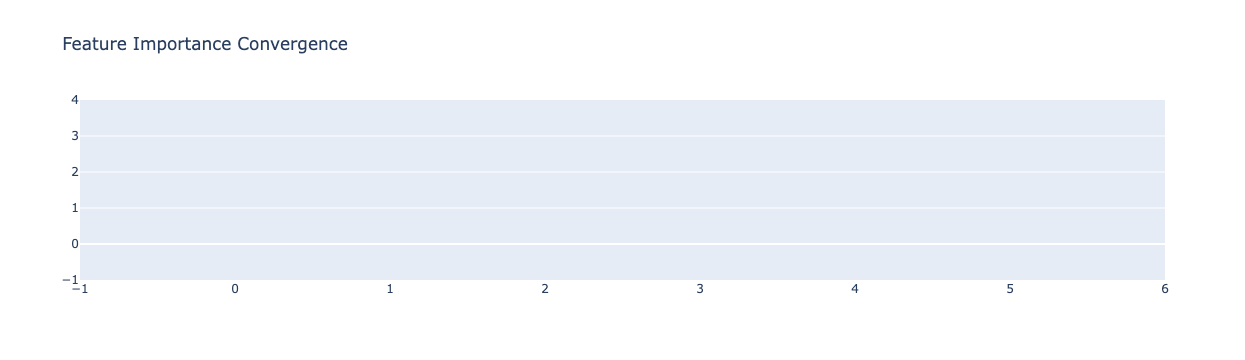

In [30]:
fig = go.Figure()

fig.add_trace(go.Histogram(x= df_r2_converge.Iteration.values, name='Top 2', text=df_r2_converge.Iteration.value_counts().sort_index()))
fig.add_trace(go.Histogram(x= df_r3_converge.Iteration.values, name='Top 3', text=df_r3_converge.Iteration.value_counts().sort_index()))
fig.add_trace(go.Histogram(x= df_r4_converge.Iteration.values, name='Top 4', text=df_r4_converge.Iteration.value_counts().sort_index()))
fig.add_trace(go.Histogram(x= df_r5_converge.Iteration.values, name='Top 5', text=df_r5_converge.Iteration.value_counts().sort_index()))
fig.add_trace(go.Histogram(x= df_r10_converge.Iteration.values, name='Top 10', text=df_r10_converge.Iteration.value_counts().sort_index()))
              
fig.update_layout(barmode='group', title_text='Feature Importance Convergence')
fig.update_traces(opacity=0.7)

fig.show()

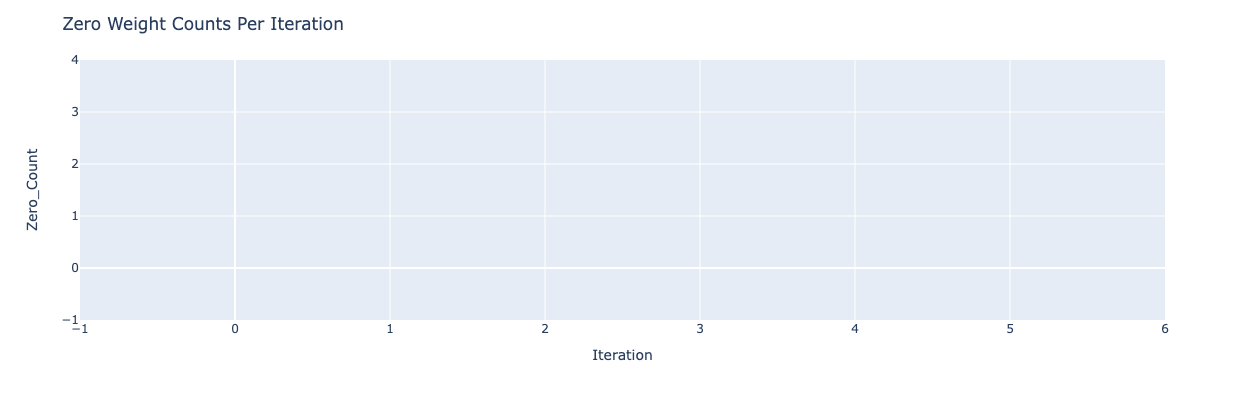

In [31]:
fig = px.box(df_zero, x = "Iteration", y = "Zero_Count", hover_data = ["DS"])

fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    title_text=f"Zero Weight Counts Per Iteration"
)

fig .show()

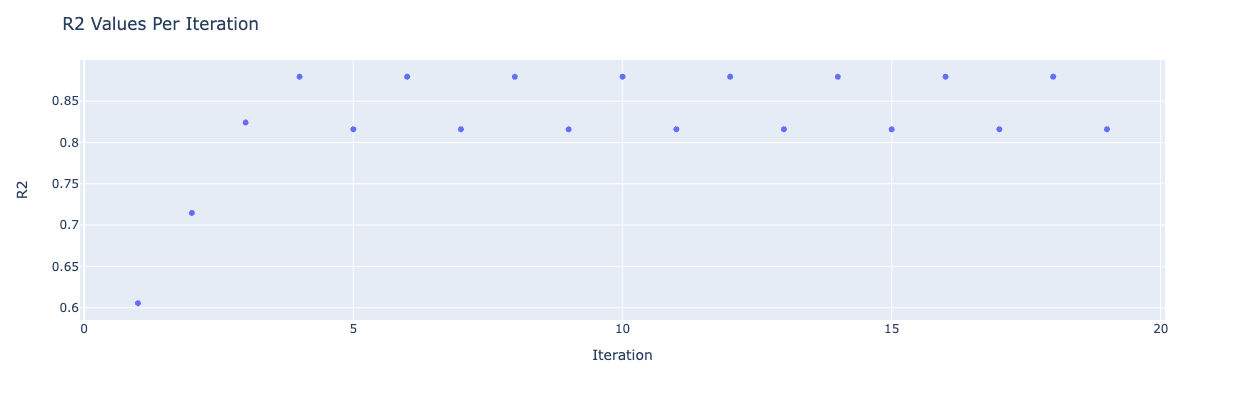

In [33]:
fig = px.scatter(df_r2, x = "Iteration", y = "R2", hover_data = ["DS"])

fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    title_text=f"R2 Values Per Iteration"
)

fig .show()

In [34]:
df_imp_1 = df_imp[~df_imp["Feature Name"].str.contains("Output")].sort_values(["DS", "Iteration", "Importance"], ascending=[True, True, False])

In [35]:
df_imp_1["Rank"] = df_imp_1.groupby(["DS", "Iteration"])["Importance"].rank(ascending=False).astype("int")

In [36]:
df_imp_2 = df_imp_1.groupby(["DS", "Iteration"], as_index=False).head(4)
# df_imp_2

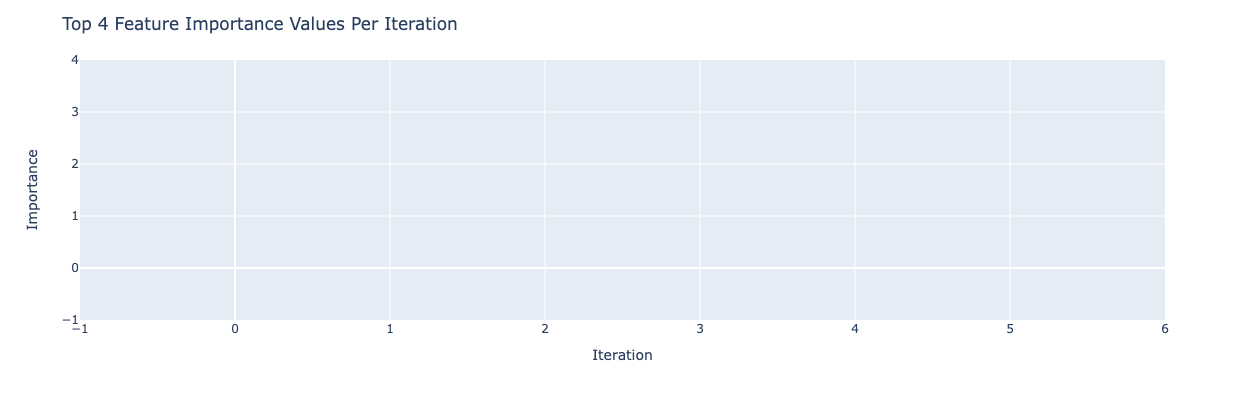

In [37]:
fig = px.box(df_imp_2, x = "Iteration", y = "Importance", hover_data = ["DS"], color="Rank")

fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    title_text=f"Top 4 Feature Importance Values Per Iteration"
)

fig .show()

In [222]:
# len([f for f in os.listdir(path_output) if os.path.isdir(path_output + f)])

In [40]:
folders = [path_output + f for f in os.listdir(path_output) if os.path.isdir(path_output + f)]

In [41]:
df_es = pd.DataFrame()

for file in folders:
    #print(file)
    df_q = pd.read_excel(os.path.join(file, "US12I1O_Sol.xlsx"), index_col=0, usecols="A:B", sheet_name=None)
    
    for el in df_q.keys():

        df_temp = pd.DataFrame({"Iteration":[el.split("_")[-1]],
                         "# of Efficient DMU":(df_q[el]==1).sum().values,
                         "DS":[file.split("_")[-1]]})

        df_es = pd.concat([df_es,df_temp], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/RealData/Recurcive/Output/Sheet1/US12I1O_Sol.xlsx'

In [42]:
fig = px.scatter(df_es, x = "Iteration", y = "# of Efficient DMU", hover_data = ["DS"])

fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    title_text=f"Efficient DMU Count Per Iteration"
)

fig .show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [] but received: Iteration